Naive Bayes: fast, uses conditional probability, generative models
Multinomial Naive Bayes: similar to Gaussian Naive Bayes but it uses multinomial distribution

In [18]:
#import dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
#load the data
data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [20]:
#pick subset of categories
categories = ["talk.religion.misc","sci.space","comp.graphics"]

#load the data
train = fetch_20newsgroups(subset="train",categories=categories)
test = fetch_20newsgroups(subset="test",categories=categories)

In [21]:
#print the sample of the dataset
print(train.data[5])

From: "danny hawrysio" <danny.hawrysio@canrem.com>
Subject: radiosity
Reply-To: "danny hawrysio" <danny.hawrysio@canrem.com>
Organization: Canada Remote Systems
Distribution: comp
Lines: 9


-> I am looking for source-code for the radiosity-method.

 I don't know what kind of machine you want it for, but the program
Radiance comes with 'C' source code - I don't have ftp access so I
couldn't tell you where to get it via that way.
--
Canada Remote Systems - Toronto, Ontario
416-629-7000/629-7044



In [22]:
#create the model
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [23]:
#train the model
model.fit(train.data,train.target) #data,label
labels = model.predict(test.data)

In [24]:
#create the confusion matrix
mat = confusion_matrix(test.target,labels)

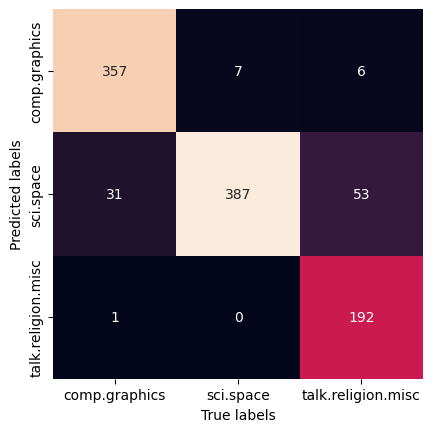

In [25]:
sns.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("True labels")
plt.ylabel("Predicted labels")
plt.show()

In [26]:
# try classifier with our text
s=""
pred = model.predict([s])
print(train.target_names[pred[0]])

sci.space
